# HW-02-02: Web Scraping Cat Images

In this exercise, you will scrape image of cats from the website below. Follow the guidelines below:

1. Create a folder named "Cat Breeds"
2. Scrape the images and save them to the folder
3. Display some random breed images

https://cats.com/cat-Breeds

## Directions
- Write code for each section in new cells directly beneath the relevant markdown sections
- When saving your notebook, please name it according to the Following format (modify appropriately for each assignment):
    - Format: HW-01-01_CarSales_\<LastName\>\<FirstInitial\>.ipynb
    - Example: HW-01-01_CarSales_WestG.ipynb

# Scrape data

In [7]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import os
from PIL import Image
import random
from IPython.display import display, Image as IPImage


In [8]:
# Function to create a folder if it doesn't already exist
def create_folder(name):
    if not os.path.exists(name):  # Check if folder doesn't exist
        os.makedirs(name)  # Create the folder
        print(f"Folder created.")
    else:
        print(f"Folder already exists.")  # Notify user if folder exists


In [9]:
# Function to download images
def download_images(url, folder, max_images=20):
    try:
        response = requests.get(url, timeout=10)  # Make a GET request to fetch the page content
        response.raise_for_status()  # Raise an exception for failed requests
        
        soup = BeautifulSoup(response.content, "html.parser")  # Parse the HTML content
        images = soup.find_all("img")  # Find all <img> tags (images)
        
        print(f"\nStarting download of images from {url}...\n") # Check to see if dowloading
        
        for i, img in enumerate(images[:max_images]):
            img_url = img.get("src")  # Get the 'src' attribute (image URL)
            
            # Check if the image URL is valid and ends with an image extension
            if img_url and img_url.startswith("http") and img_url.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_data = requests.get(img_url, timeout=10).content  # Download image data
                    with open(f"{folder}/cat_breed_{i+1}.jpg", "wb") as f:
                        f.write(img_data)  # Save the image to a file
                    print(f"Downloaded image")  # Notify user of successful download
                except requests.exceptions.RequestException as e:
                    print(f"Error downloading image: {e}")  # Handle errors downloading images
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the website: {e}")  # Handle errors fetching the webpage


In [10]:
# Display images in the notebook using IPython.display
def display_random_images(folder, num_images=5):
    image_files = [f for f in os.listdir(folder) if f.endswith((".jpg"))]  # Get image files
    if not image_files:
        print("No images were downloaded.")  # Handle case when no images are found
    else:
        for img_file in random.sample(image_files, min(num_images, len(image_files))):
            try:
                # Display the image directly in the notebook
                img_path = os.path.join(folder, img_file)
                display(IPImage(img_path))  # Show the image inline
            except Exception as e:
                print(f"Error displaying image {img_file}: {e}")  # Handle errors displaying the image


# Display Images

Folder created.

Starting download of images from https://cats.com/cat-breeds...

Downloaded image
Downloaded image
Downloaded image
Downloaded image
Downloaded image
Downloaded image
Downloaded image
Downloaded image


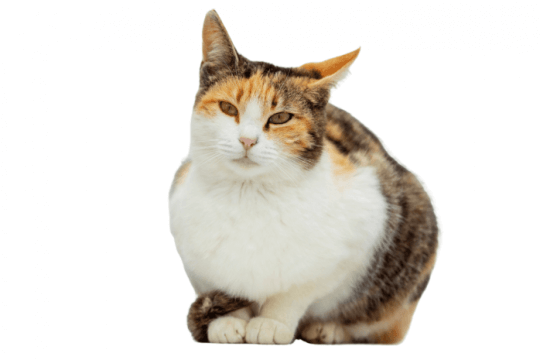

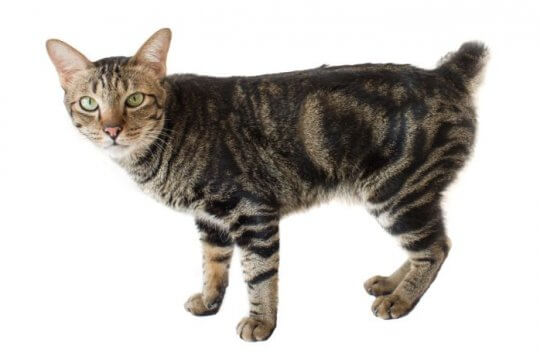

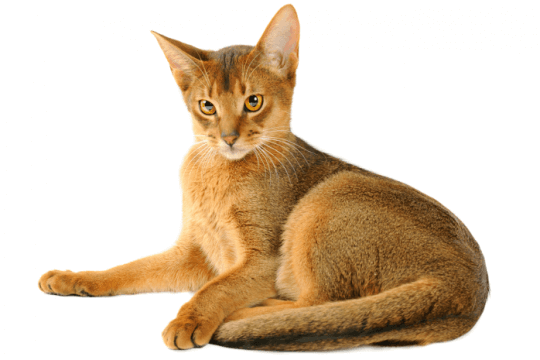

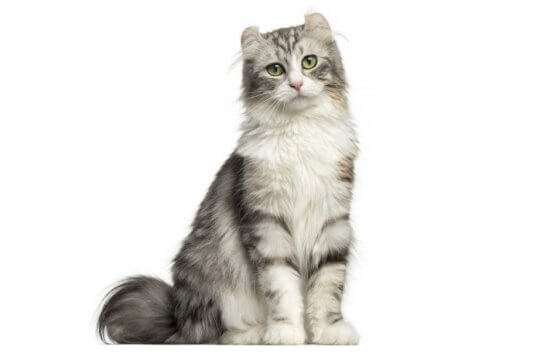

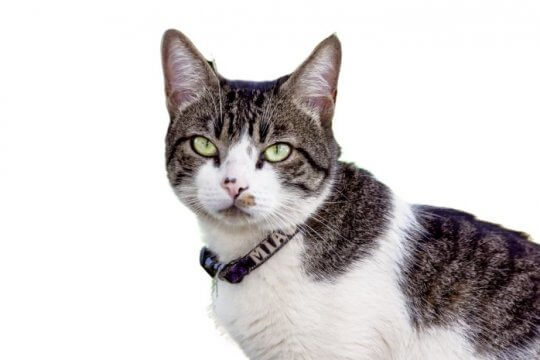

In [11]:
# Set the folder name to store images
cats = "Cat Breeds"

# Create the folder if it doesn't exist
create_folder(cats)

# Download images from the URL
download_images("https://cats.com/cat-breeds", cats)

# Display random images inline in the notebook
display_random_images(cats)
